In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image


Data loaded successfully from ..\out\mandelbrot_amd_seq_1000.out with shape (2000, 3000).
Image saved successfully to mandelbrot_amd_seq_1000.png.


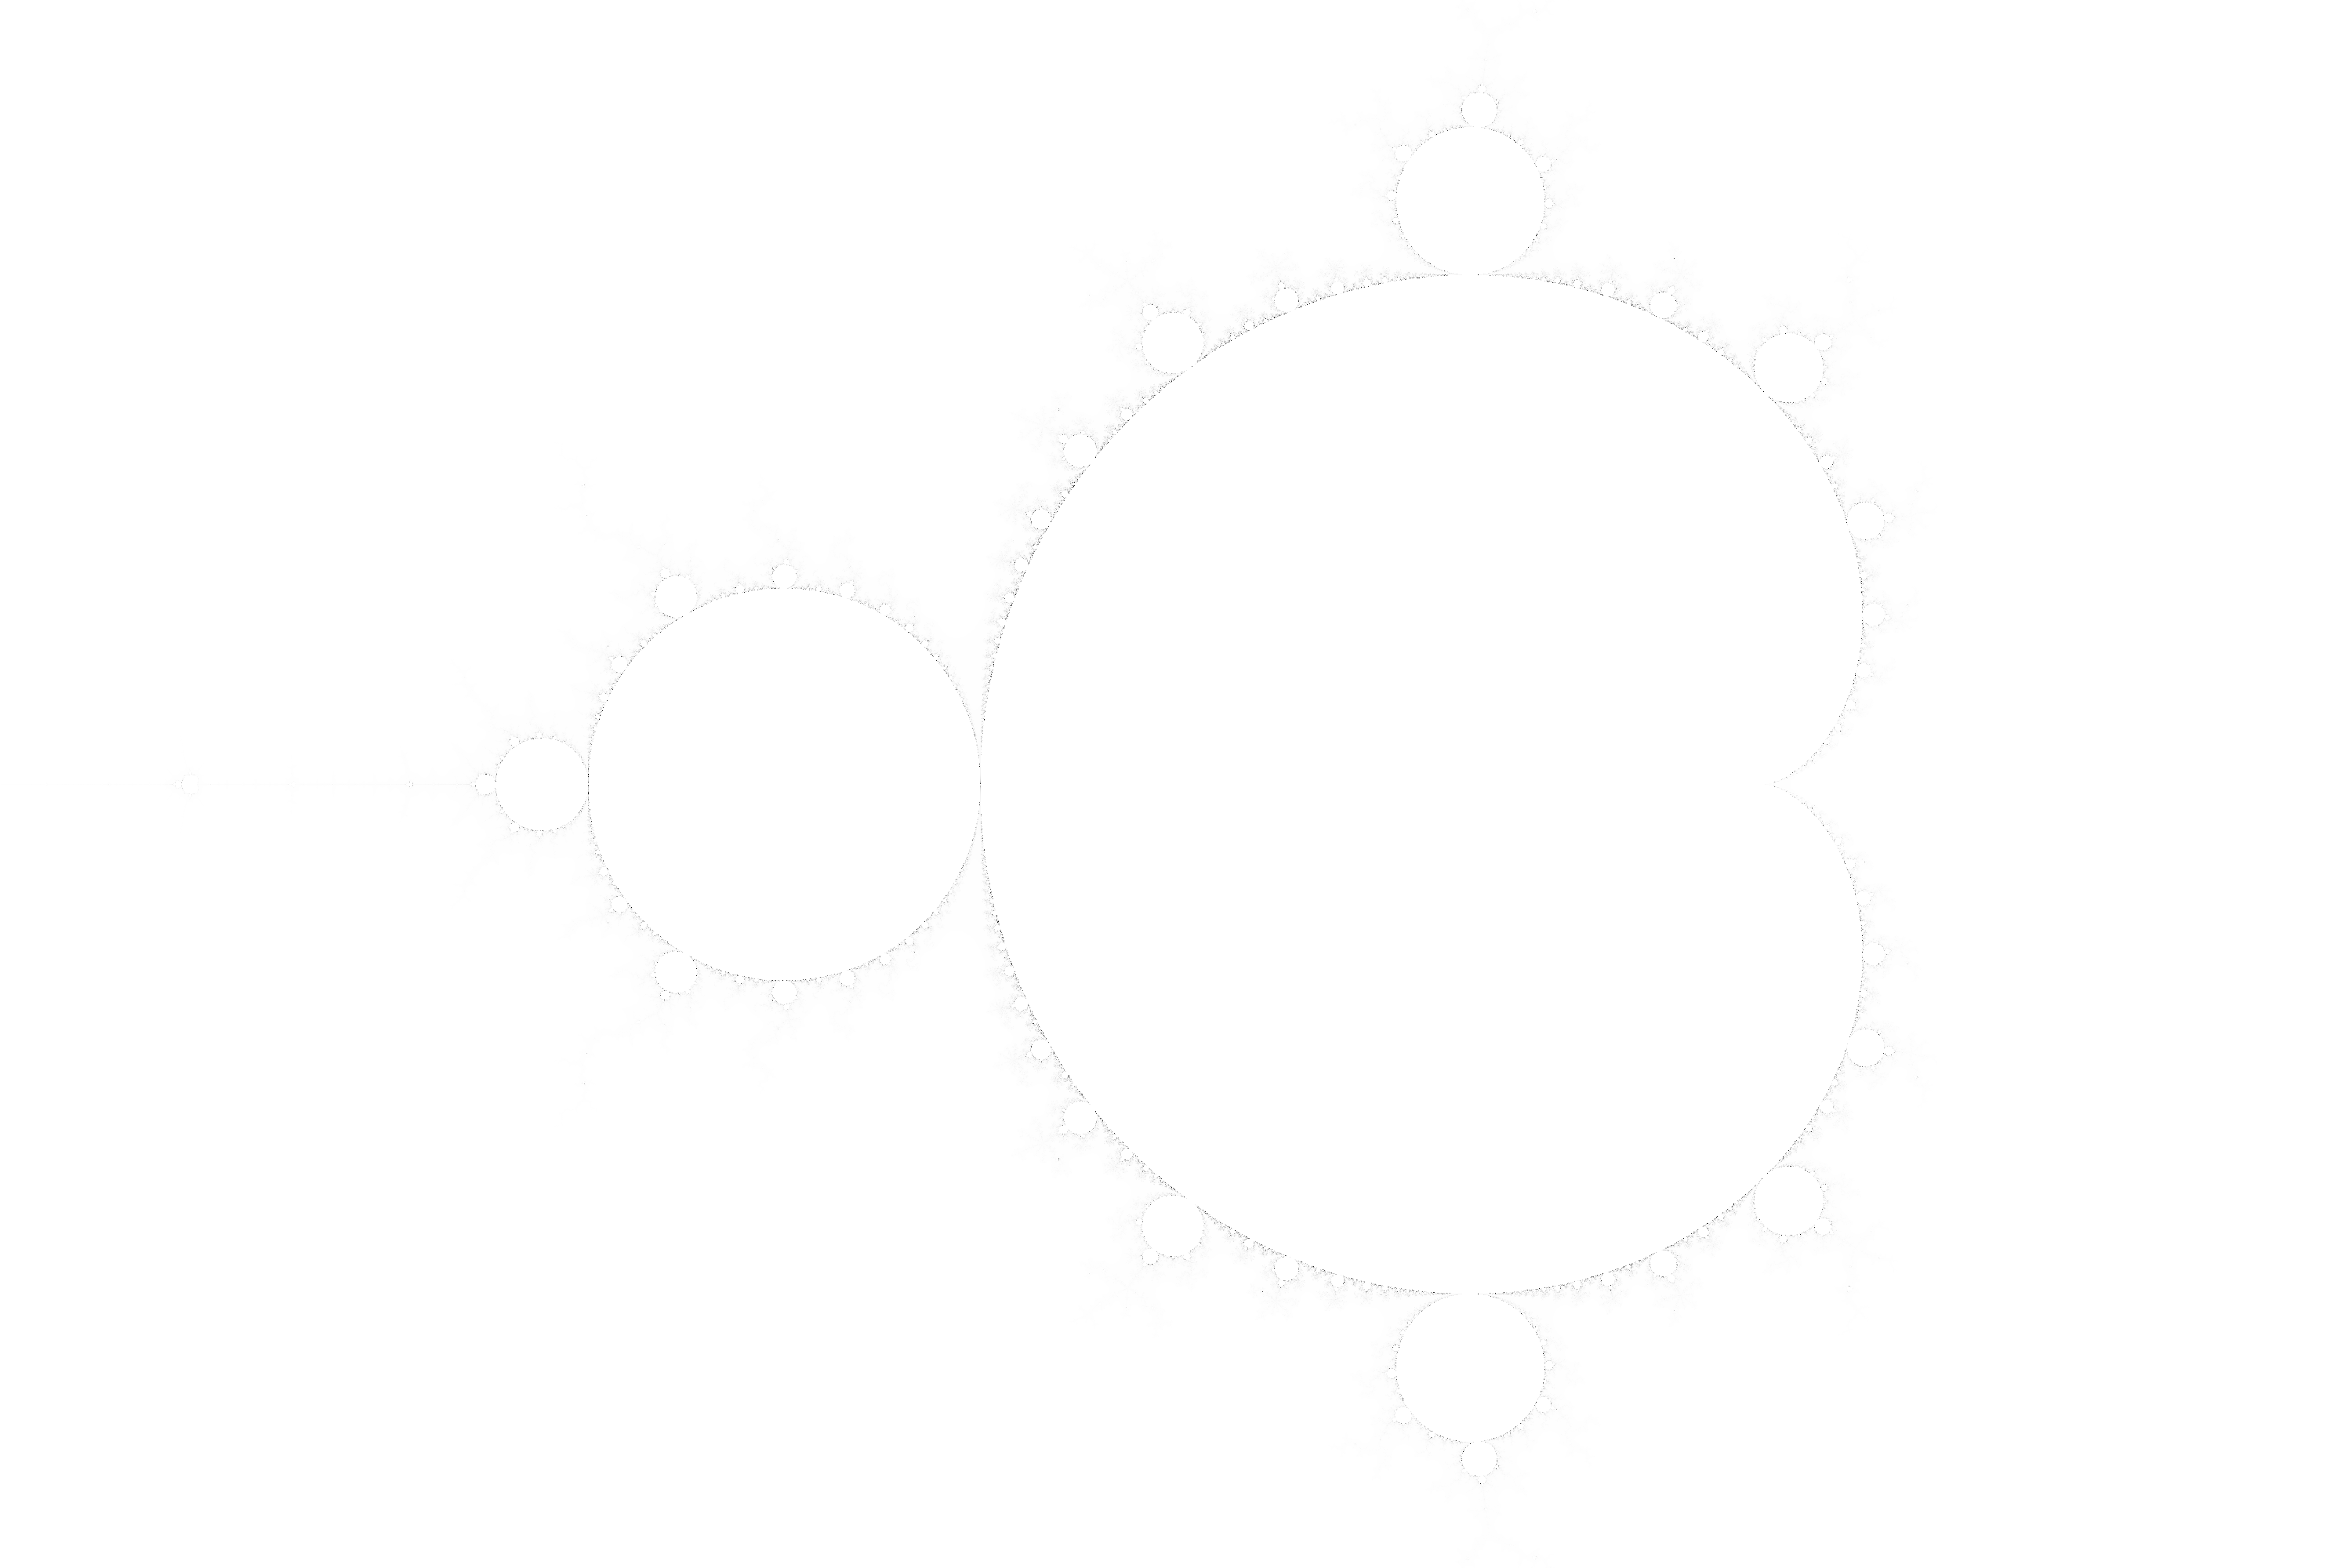

In [5]:
def txt_to_clean_image(txt_path, img_path, colormap='Spectral'):
    
    try:
        # Load data with comma delimiter
        data = np.genfromtxt(txt_path, delimiter=',')
        
        # Verify data dimensions
        if data.ndim != 2:
            print("Error: Data is not 2-dimensional.")
            return
        
        print(f"Data loaded successfully from {txt_path} with shape {data.shape}.")

        # Normalize data to [0, 255]
        data_min, data_max = np.min(data), np.max(data)
        if data_max - data_min == 0:
            print("Error: Data has no variation.")
            return
        normalized_data = (data - data_min) / (data_max - data_min)  # [0,1]
        normalized_data = (normalized_data * 255).astype(np.uint8)  # [0,255]
        
        # Apply colormap using matplotlib
        cmap = plt.get_cmap(colormap)
        colored_data = cmap(normalized_data / 255.0)[:, :, :3]  # Extract RGB channels
        colored_data = (colored_data * 255).astype(np.uint8)
        
        # Convert to Image
        image = Image.fromarray(colored_data, mode='RGB')
        
        # Save the image
        image.save(img_path)
        print(f"Image saved successfully to {img_path}.")

    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
path_to_out_file : Path = Path("./../out") / "mandelbrot_amd_seq_1000.out"
if path_to_out_file.exists():
	outfile = Path(".") / "mandelbrot_amd_seq_1000.png"
	txt_to_clean_image(path_to_out_file, outfile, colormap='binary')
	display(Image.open(outfile))
else:
	print(f"File {path_to_out_file} does not exist")